In [1]:
from scipy.stats import multivariate_normal, ttest_rel, ttest_ind
import matplotlib.pyplot as plt
from numpy import arange

In [2]:
def plot_t_values(mu1=2, sigma1=3, mu2=2, sigma2=3, independent_test=True):
    for corr_coeff in [-0.9999, -0.5, 0, 0.5, 0.9999]:
        t_values = []
        for i in range(1000):
            sample = multivariate_normal([0, 0], [[1, corr_coeff], [corr_coeff, 1]]).rvs(1000)
            X = (sample[:, 0] + mu1) * sigma1
            Y = (sample[:, 1] + mu2) * sigma2
            if independent_test:
                t_values.append(ttest_ind(X, Y, equal_var= sigma1 == sigma2)[0])
            else:
                t_values.append(ttest_rel(X, Y)[0])
        plt.hist(t_values, label=f'corr_coeff={round(corr_coeff, 2)}', alpha=0.5, bins=10)
    
    plt.title(f't-values distribution for N({mu1}, {sigma1}), N({mu2}, {sigma2})')
    plt.legend()
    plt.show()

In [3]:
def plot_first_type_error_distribution(mu1=2, sigma1=3, mu2=2, sigma2=3, independent_test=True):
    errors = []
    for corr_coeff in arange(-0.9999, 0.9999, 0.1):
        p_values = []
        for i in range(1000):
            sample = multivariate_normal([0, 0], [[1, corr_coeff], [corr_coeff, 1]]).rvs(1000)
            X = (sample[:, 0] + mu1) * sigma1
            Y = (sample[:, 1] + mu2) * sigma2
            if independent_test:
                p_values.append(ttest_ind(X, Y, equal_var= sigma1 == sigma2)[1])
            else:
                p_values.append(ttest_rel(X, Y)[1])
        error = len([x for x in p_values if x < 0.05]) / len(p_values)
        errors.append(error)
    plt.scatter(x=arange(-1, 1, 0.1), y=errors)
    plt.title(f'I-type error distribution for N({mu1}, {sigma1}), N({mu2}, {sigma2})')
    plt.xlabel('corr coeff')
    plt.ylabel('I-type error')
    plt.show()

Let's evaluate the task for different situations. Firstly, let's see what's going on when the means and variations are the same:

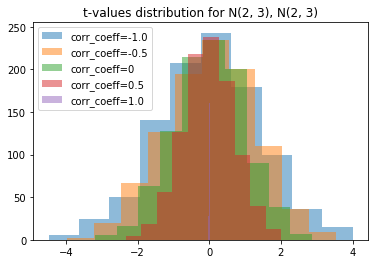

In [4]:
plot_t_values()

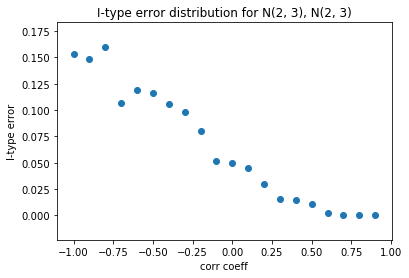

In [5]:
plot_first_type_error_distribution()

Next, let's try using different variations:

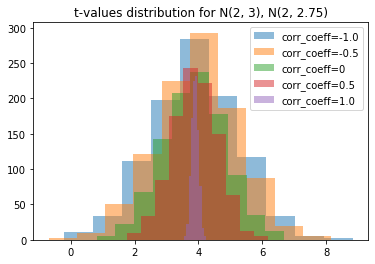

In [6]:
plot_t_values(mu1=2, sigma1=3, mu2=2, sigma2=2.75)

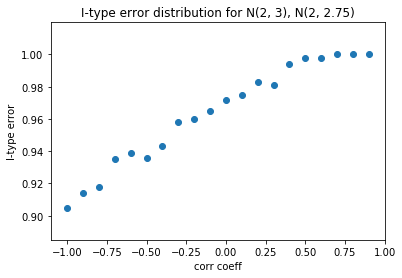

In [7]:
plot_first_type_error_distribution(mu1=2, sigma1=3, mu2=2, sigma2=2.75)

Let's also check what's going on for relation based t-test and different or similar sigmas:

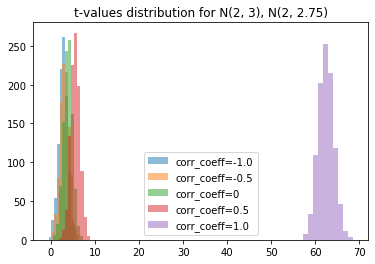

In [8]:
plot_t_values(mu1=2, sigma1=3, mu2=2, sigma2=2.75, independent_test=False)

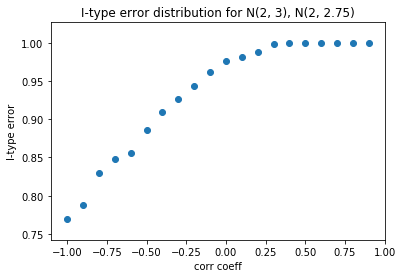

In [9]:
plot_first_type_error_distribution(mu1=2, sigma1=3, mu2=2, sigma2=2.75, independent_test=False)

For similar sigmas:

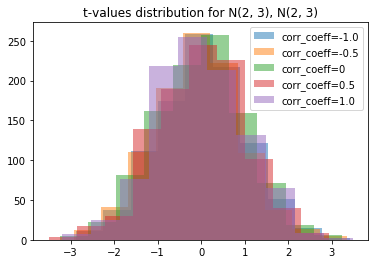

In [11]:
plot_t_values(mu1=2, sigma1=3, mu2=2, sigma2=3, independent_test=False)

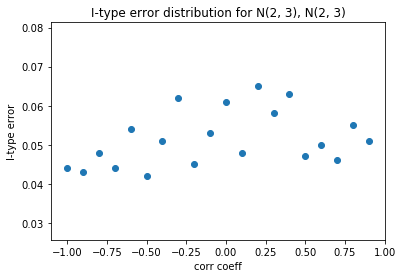

In [10]:
plot_first_type_error_distribution(mu1=2, sigma1=3, mu2=2, sigma2=3, independent_test=False)

Overall, we can see that in case we independent test for really similar, but correlated samples, we have a raise in I-type error for anticorrelation. Having used the test for correlated samples we do not obtain such a prenomenon. As for the density of t-value distribution we can see that using independant test makes the distribution besome more sharp for larger correlation coefficient, though it doesn't happen for the relational test.

It as also surprising for me to see that both test work badly for samples with different variations, though they should actually be working fine as the t-test is only checking the mean value similarity.